In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Data Analyst Nanodegree
##Project 2: Analyzing the NYC Subway Dataset

##Section 1. Statistical Test

###1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

###1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples. 

The Mann-Whitney U-test was used to compare the mean ridership of rainy days vs non-rainy days. This test is suitable as the underlying distributions are not normally distributed (non-parametric test).

A two-tail test and hence a two-tail P value was used. The two-tail test is suitable as the test is to establish whether there is any significant difference in means of the two datasets (positive or negative).

Null Hypothesis: There 'is no significant difference' in population average ridership on rainy days compared to the average ridership on non-rainy days.

Alternative Hypothesis: There 'is a significant difference' in population average ridership on rainy days compared to the average ridership on non-rainy days.

In [4]:
import pandas as pd
import numpy as np
import scipy.stats

In [5]:
path = r'data\turnstile_weather_v2.csv'
dataFrame = pd.read_csv(path)
dataFrame

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
5,R003,05-02-11,00:00:00,4388348,2911036,15,34,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
6,R003,05-02-11,04:00:00,5818689,3874767,19,40,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
7,R003,05-02-11,08:00:00,4388855,2911194,488,118,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
8,R003,05-02-11,12:00:00,4389345,2911326,490,132,2011-05-02 12:00:00,12,0,...,30.24,0,57.0,11.5,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
9,R003,05-02-11,16:00:00,4389576,2911558,231,232,2011-05-02 16:00:00,16,0,...,30.16,0,59.0,11.5,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177


In [6]:
df_rain = dataFrame[dataFrame.rain != 0]
df_norain = dataFrame[dataFrame.rain == 0]

df_rainent = df_rain['ENTRIESn_hourly']
df_norainent = df_norain['ENTRIESn_hourly']

###1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test. 

###1.4 What is the significance and interpretation of these results?

In [7]:
print "Mean ridership for rain group:"
df_rainent.mean()

Mean ridership for rain group:


2028.1960354720918

In [8]:
print "Standard deviation of ridership for rain group:"
df_rainent.std()

Standard deviation of ridership for rain group:


3189.4333728816387

In [9]:
print "Mean ridership for non-rain group:"
df_norainent.mean()

Mean ridership for non-rain group:


1845.5394386644084

In [10]:
print "Standard deviation of ridership for non-rain group:"
df_norainent.std()

Standard deviation of ridership for non-rain group:


2878.7708479755574

The mean ridership for the rain group is higher than the non-rain group, however ridership datapoints for the rain group also have greater standard deviation than the non-rain group. Below forms the test for statistically significant difference between mean ridership of the two groups.

In [11]:
n = len(df_rain)

print "Number of observations with rain:"
n

Number of observations with rain:


9585

In [12]:
n = len(df_norain)

print "Number of observations without rain:"
n

Number of observations without rain:


33064

In [11]:
# Note: Followed 'Method Two' (see: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test) to find the critical 
# value, as the sample size is > ~20 and therefore U is assumed to be approximately normally distributed.

In [13]:
U,p = scipy.stats.mannwhitneyu(df_rainent, df_norainent)
m_u = (len(df_rainent) * len(df_norainent)) / 2
sigma_u = np.sqrt(len(df_rainent) * len(df_norainent) * (len(df_rainent) + len(df_norainent) + 1) / 12)
z = (U - m_u) / sigma_u
p = 2 * scipy.stats.norm.cdf(z)

print "Mann-Whitney U-test statistic:"
p

Mann-Whitney U-test statistic:


5.4826938714192724e-06

We reject the Null Hypothesis that there 'is no significant difference' in population average ridership on rainy days compared to the average ridership on non-rainy days at the 5% significance level. (5.48e-06 < 0.05)

##Section 2. Linear Regression

###2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model: OLS using Statsmodels or Scikit Learn, Gradient descent using Scikit Learn, Or something different?

###2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?

###2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that the selected features will contribute to the predictive power of your model. 

OLS (using statsmodels) was used to compute the coefficients theta and produce prediction for ENTRIESn_hourly (hourly number of entries).

Features considered in the model include:
1) 'hour': Expectation that ridership varies based on the time of day (peak vs. non-peak transit hours).
2) 'weekday': Expectation that ridership varies based on weekdays vs. weekends (business vs. leisure transit).
3) 'UNIT': A transformed dummy variable to account for higher/lower trafficked units. This is to account for disparity between stations average ridership due to (for example) whether the station is located in a heavy/less populated area.

Note that 'rain', 'fog' and 'tempi' were also considered, however they were not found to significantly increase the predictive power (R2) of the model.

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
path = r'data\turnstile_weather_v2.csv'
dataFrame = pd.read_csv(path)
#dataFrame

In [16]:
y = dataFrame['ENTRIESn_hourly']

x = dataFrame[['hour', 'weekday']]
#x = dataFrame[['hour', 'weekday', 'rain', 'fog', 'tempi']]

unit_dum = pd.get_dummies(dataFrame['UNIT'], prefix = 'unit')
x = x.join(unit_dum)

In [17]:
result = sm.OLS(y, x).fit()

###2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?

###2.5 What is your model’s R2 (coefficients of determination) value?

In [18]:
result.rsquared
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     163.3
Date:                Thu, 03 Sep 2015   Prob (F-statistic):               0.00
Time:                        16:31:20   Log-Likelihood:            -3.8730e+05
No. Observations:               42649   AIC:                         7.751e+05
Df Residuals:                   42407   BIC:                         7.772e+05
Df Model:                         241                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
hour         123.3863      1.488     82.918      0.000       120.470   126.303
weekday      981.3665     22.863     42.924      0.000       936.555  1026.178
unit_R003  -1735.2256    166.029    -10.451      0.000     -2060.647 -1409.805
unit_R004  -1401.6229    162.734     -8.613      0.000     -1720.584 -1082.662
unit_R005  -1401.3884    164.104     -8.540      0.000     -1723.035 -1079.742
unit_R006  -1283.9222    160.427     -8.003      0.000     -1598.362  -969.482
unit_R007  -1570.5069    165.051     -9.515      0.000     -1894.011 -1247.003
unit_R008  -1561.9768    165.565     -9.434      0.000     -1886.487 -1237.467
unit_R009  -1614.2520    162.717     -9.921      0.000     -1933.181 -1295.323
unit_R011   5426.2351    158.753     34.180      0.000      5115.076  5737.395
unit_R012   6770.0165    157.893     42.877      0.000      6460.543  7079.490
unit_R013    668.4574    157.893      4.234      0.000       358.984   977.931
unit_R016  -1143.4932    158.753     -7.203      0.000     -1454.653  -832.334
unit_R017   2283.4520    157.893     14.462      0.000      1973.979  2592.925
unit_R018   5873.0658    158.321     37.096      0.000      5562.753  6183.379
unit_R019   1337.3445    157.893      8.470      0.000      1027.871  1646.818
unit_R020   4459.5488    157.893     28.244      0.000      4150.076  4769.022
unit_R021   2780.5306    158.740     17.516      0.000      2469.396  3091.665
unit_R022   7603.9413    157.893     48.159      0.000      7294.468  7913.414
unit_R023   4239.1187    157.893     26.848      0.000      3929.646  4548.592
unit_R024   1303.8029    158.309      8.236      0.000       993.515  1614.091
unit_R025   3434.2370    157.893     21.750      0.000      3124.764  3743.710
unit_R027   1053.5542    157.893      6.673      0.000       744.081  1363.027
unit_R029   5315.5273    157.893     33.665      0.000      5006.054  5625.000
unit_R030   1185.7208    157.893      7.510      0.000       876.248  1495.194
unit_R031   2437.4897    157.893     15.438      0.000      2128.016  2746.963
unit_R032   2536.5326    158.309     16.023      0.000      2226.245  2846.821
unit_R033   6320.5004    157.893     40.030      0.000      6011.027  6629.974
unit_R034   -732.8214    165.106     -4.438      0.000     -1056.432  -409.211
unit_R035    891.2460    158.753      5.614      0.000       580.086  1202.406
unit_R036  -1138.9980    161.826     -7.038      0.000     -1456.181  -821.815
unit_R037  -1053.2559    159.157     -6.618      0.000     -1365.206  -741.305
unit_R038  -1689.7459    162.703    -10.385      0.000     -2008.648 -1370.844
unit_R039  -1121.3100    167.060     -6.712      0.000     -1448.751  -793.869
unit_R040   -651.8770    158.740     -4.107      0.000      -963.011  -340.743
unit_R041   1185.5327    157.893      7.508      0.000       876.060  1495.006
un

In [19]:
pred = result.predict(x)
(y - pred).mean()

-3.814367338504984e-11

The final R2 (coefficient of determination) value for the fitted model was 0.481. That is, just over 48% of the variation of number of ENTRIESn_hourly (hourly number of entries) can be explained by the included features: 'hour' (time of day), 'weekday' (day of week), and 'UNIT' (accounting for the disparity in average ridership between stations).

The low R2 value suggests that caution should be exercised when using this model in order to generate a prediction of future ridership.

##Section 3. Visualization

###Please include two visualizations that show the relationships between two or more variables in the NYC subway data. Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure. 

In [20]:
import pandas as pd
import numpy as np
import itertools as itr
import matplotlib.pyplot as plt
from ggplot import * ## requires ggplot: $ pip install ggplot, also note: https://github.com/yhat/ggplot/issues/417
%matplotlib inline

In [21]:
path = r'data\turnstile_weather_v2.csv'
df_raw = pd.read_csv(path)
#df_raw

In [22]:
#df_rain = df_raw[df_raw.rain != 0]
#df_rain = df_raw.reset_index(drop = True)

In [23]:
#plot_rainent = ggplot(df_rain, aes(x = 'ENTRIESn_hourly')) +\
#    geom_histogram() +\
#    ggtitle('Total Hourly Entries (Obs with Rain)') +\
#    xlab('Entries Range') +\
#    ylab('Density')
#
#plot_rainent

In [24]:
#df_norain = df_raw[df_raw.rain == 0]
#df_norain = df_raw.reset_index(drop = True)

In [25]:
#plot_norainent = ggplot(df_norain, aes(x = 'ENTRIESn_hourly')) +\
#    geom_histogram() +\
#    ggtitle('Total Hourly Entries (Obs without Rain)') +\
#    xlab('Entries Range') +\
#    ylab('Density')
#
#plot_norainent

C:\Anaconda\lib\site-packages\ggplot\ggplot.py:200: RuntimeWarning: Facetting is currently not supported with geom_bar. See
                    https://github.com/yhat/ggplot/issues/196 for more information
  warnings.warn(msg, RuntimeWarning)
stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.
C:\Anaconda\lib\site-packages\ggplot\geoms\geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


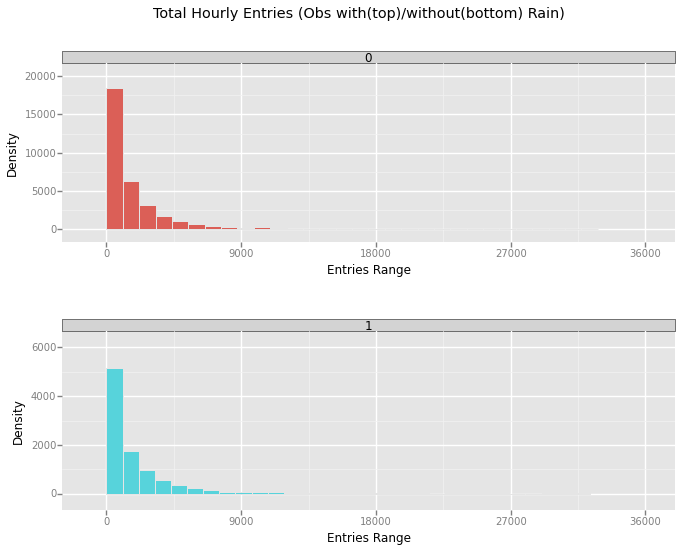

<ggplot: (55987748)>

In [26]:
plot_entbyrain = ggplot(df_raw, aes('ENTRIESn_hourly', fill = 'rain')) +\
    geom_histogram(position = 'dodge') +\
    facet_wrap('rain') +\
    ggtitle("Total Hourly Entries (Obs with(top)/without(bottom) Rain)") +\
    xlab('Entries Range') +\
    ylab('Density')
    
plot_entbyrain

Data suggests a similar distribution for entry data on days where it rained vs. days where it did not rain. Note the greater amount of entry observations (distribution height) were recorded on days where it did not rain.

In [27]:
df_raw.station.unique()
df_sumbystat = df_raw.groupby('station', as_index = False).sum()
df_sumbystat = df_sumbystat.sort('ENTRIESn_hourly')

In [28]:
df_sumbytopstat = df_sumbystat[-10:]
df_sumbytopstat

,station,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
184,ROOSEVELT AVE,14122303841,11054755492,1444569,1200120,1852,541,132,7538.131175,-13669.901785,...,5543.78,42,11575.6,1715.2,0.29,5543.78,11575.6,1715.2,7533.305450,-13669.315335
109,CHAMBERS ST,18541135465,15720716541,1452740,1258636,3720,1092,264,15145.718670,-27530.464872,...,11150.00,84,23582.6,2057.8,2.30,11150.00,23582.6,2057.8,15143.387532,-27533.531640
157,MAIN ST,24054590021,18264333309,1554806,1174953,1860,546,132,7581.281508,-13732.390416,...,5573.64,42,11635.7,1722.1,0.29,5573.64,11635.7,1722.1,7575.965814,-13734.230886
47,42 ST-GRD CNTRL,25565627027,13588473095,1555117,968557,1860,546,132,7579.843914,-13759.711770,...,5575.00,42,11791.3,1028.9,1.15,5575.00,11791.3,1028.9,7579.989552,-13760.135850
72,86 ST,30263728271,12550911889,1788577,708006,5528,1611,391,22441.797552,-40765.330650,...,16514.73,125,34959.0,3049.7,3.45,16514.73,34959.0,3049.7,22447.122366,-40756.210440
61,59 ST-COLUMBUS,26073384869,16950521617,1868674,1467338,1860,546,132,7582.868460,-13760.631726,...,5575.00,42,11791.3,1028.9,1.15,5575.00,11791.3,1028.9,7583.053344,-13762.101312
155,LEXINGTON AVE,30833183606,22787299781,1955971,1477588,5496,1613,389,22379.127097,-40608.009909,...,16455.48,124,34826.3,3040.4,3.37,16455.48,34826.3,3040.4,22375.175585,-40606.827866
49,42 ST-TIMES SQ,26834937069,19495797347,2360981,2043030,3712,1088,263,15120.440755,-27448.992984,...,11120.01,84,23524.7,2054.3,2.30,11120.01,23524.7,2054.3,15119.226472,-27446.292475
44,34 ST-PENN STA,52066169667,36329100254,2914046,2414830,5580,1638,396,22739.397078,-41287.909488,...,16725.00,126,35373.9,3086.7,3.45,16725.00,35373.9,3086.7,22734.881370,-41288.097720
43,34 ST-HERALD SQ,44562682980,29457052499,2920887,2001199,3720,1092,264,15158.826276,-27523.498428,...,11150.00,84,23582.6,2057.8,2.30,11150.00,23582.6,2057.8,15157.660428,-27521.154456


In [29]:
#plot_sumentbydow = ggplot(df_sumbytopstat, aes(x = 'station', y = 'ENTRIESn')) \
#    + geom_bar(stat = 'identity') \
#    + ggtitle('Total Entries by Station') \
#    + xlab('Station') \
#    + ylab('Total Entries')
#plot_sumentbydow

In [30]:
# The number of entries varies greatly depending on the station. Ridership is greatest for '34 ST-HERALD SQ' and
# '34 ST-PENN STA'.

In [31]:
df_sumbybotstat = df_sumbystat[:10]
df_sumbybotstat

,station,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
76,AQUEDUCT TRACK,69397414,15769920,0,0,1720,479,122,6872.929349,-12477.950394,...,5066.99,37,10490.9,1669.0,0.47,5066.99,10490.9,1669.0,6871.540676,-12479.779481
86,BEACH 36 ST,243830479,132260309,4712,20622,1752,502,126,7063.596294,-12835.665756,...,5215.56,40,10794.6,1747.3,0.47,5215.56,10794.6,1747.3,7073.337162,-12822.786624
172,ORCHARD BEACH,43770544,2378453,7559,309,896,238,65,3595.012696,-6496.871216,...,2632.83,32,5874.8,891.8,0.22,2632.83,5874.8,891.8,3594.301392,-6497.073088
88,BEACH 60 ST,930034257,1015362095,19342,54643,1648,471,117,6657.142776,-12101.312852,...,4916.07,34,10160.5,1658.5,0.46,4916.07,10160.5,1658.5,6668.240656,-12110.555236
87,BEACH 44 ST,256376055,357238875,29445,22502,1708,490,120,6819.659952,-12394.440744,...,5036.11,34,10412.3,1685.3,0.46,5036.11,10412.3,1685.3,6830.880672,-12405.934632
105,BUSHWICK AVE,332932302,337390640,36338,34257,1704,473,120,6712.622070,-12194.407665,...,4943.59,38,10337.3,1547.9,0.18,4943.59,10337.3,1547.9,6716.372520,-12193.954740
78,AVE H,522165241,644746769,36838,62772,1788,517,126,7231.991192,-13165.178684,...,5335.02,39,11304.3,990.7,1.11,5335.02,11304.3,990.7,7233.177028,-13165.021154
118,CYPRESS HILLS,713686911,474209742,37472,26364,1696,478,122,6835.910760,-12410.590752,...,5033.89,39,10507.4,1575.6,0.21,5033.89,10507.4,1575.6,6837.658464,-12413.045736
33,215 ST,940958607,305612290,45118,25759,1776,514,124,7152.137825,-12935.182575,...,5244.25,40,10978.5,1628.6,0.29,5244.25,10978.5,1628.6,7150.148250,-12934.605775
173,OXFORD-104 ST,610257601,541097136,45543,41108,1676,488,119,6793.851415,-12330.884377,...,5006.26,38,10384.3,1656.2,0.47,5006.26,10384.3,1656.2,6793.461971,-12333.134535


In [32]:
#plot_sumentbydow = ggplot(df_sumbybotstat, aes(x = 'station', y = 'ENTRIESn')) \
#    + geom_bar(stat = 'identity') \
#    + ggtitle('Total Entries by Station') \
#    + xlab('Station') \
#    + ylab('Total Entries')
#plot_sumentbydow

In [33]:
# Ridership is lowest for 'OXFORD-104 ST' and '215 ST'.

In [34]:
df_sumentbydow = df_raw.groupby('day_week', as_index = False).sum()
df_meanentbydow = df_raw.groupby('day_week', as_index = False).mean()

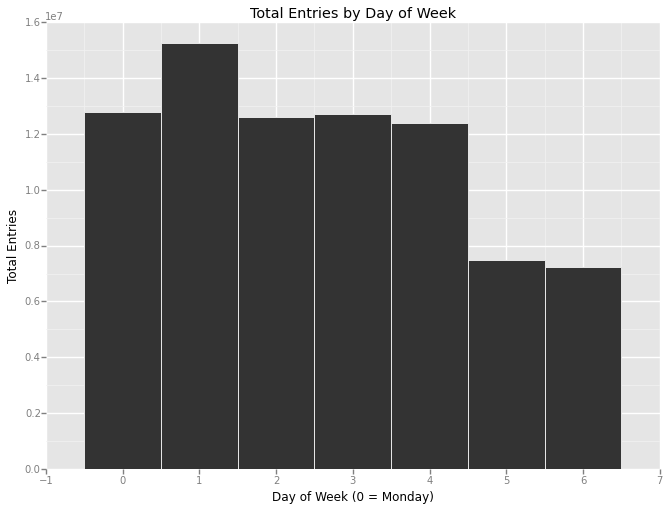

<ggplot: (33983201)>

In [35]:
plot_sumentbydow = ggplot(df_sumentbydow, aes(x = 'day_week', y = 'ENTRIESn_hourly')) \
    + geom_bar(stat = 'identity') \
    + ggtitle('Total Entries by Day of Week') \
    + xlab('Day of Week (0 = Monday)') \
    + ylab('Total Entries')
plot_sumentbydow

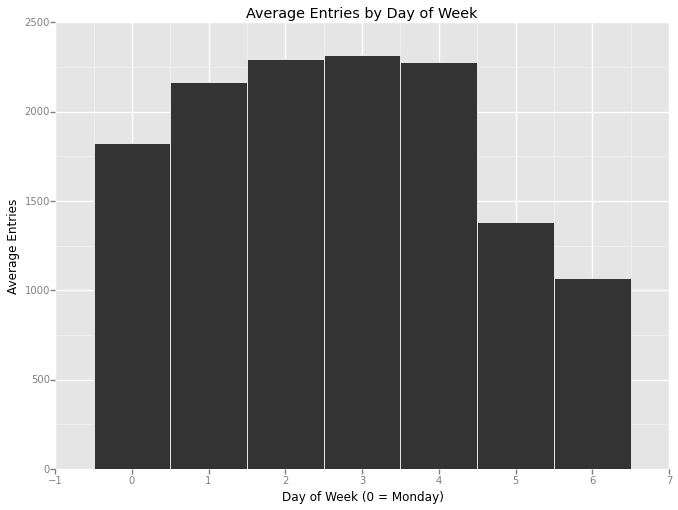

<ggplot: (34422749)>

In [36]:
plot_meanentbydow = ggplot(df_meanentbydow, aes(x = 'day_week', y = 'ENTRIESn_hourly')) \
    + geom_bar(stat = 'identity') \
    + ggtitle('Average Entries by Day of Week') \
    + xlab('Day of Week (0 = Monday)') \
    + ylab('Average Entries')
plot_meanentbydow

Total/average entry data over a single week shows that weekdays have greater ridership than weekends.

In [37]:
df_sumentbyhr = df_raw.groupby('hour', as_index = False).sum()
df_meanentbyhr = df_raw.groupby('hour', as_index = False).mean()

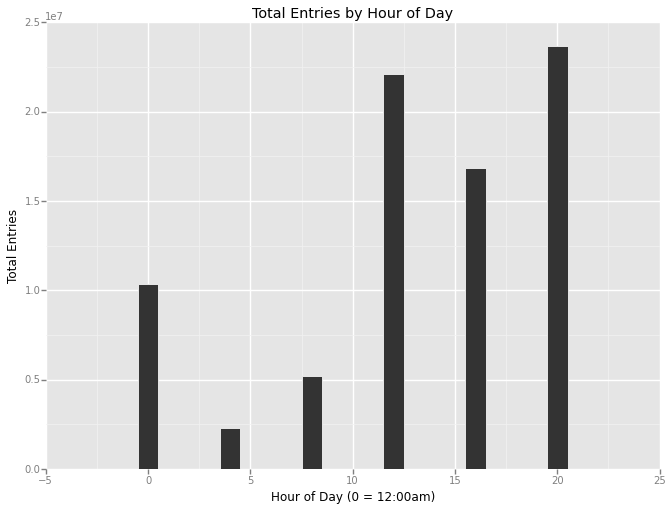

<ggplot: (56482652)>

In [38]:
plot_sumentbyhr = ggplot(df_sumentbyhr, aes(x = 'hour', y = 'ENTRIESn_hourly')) \
    + geom_bar(stat = 'identity') \
    + ggtitle('Total Entries by Hour of Day') \
    + xlab('Hour of Day (0 = 12:00am)') \
    + ylab('Total Entries')
plot_sumentbyhr

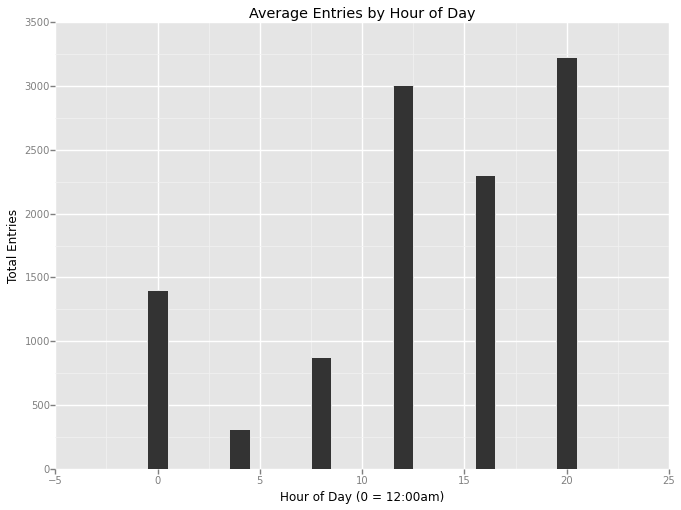

<ggplot: (56319951)>

In [39]:
plot_meanentbyhr = ggplot(df_meanentbyhr, aes(x = 'hour', y = 'ENTRIESn_hourly')) \
    + geom_bar(stat = 'identity') \
    + ggtitle('Average Entries by Hour of Day') \
    + xlab('Hour of Day (0 = 12:00am)') \
    + ylab('Total Entries')
plot_meanentbyhr

Average entry data over a single day shows a greater ridership from midday onwards.

##Section 4. Conclusion

###4.1 From your analysis and interpretation of the data, do more people ride the NYC subway when it is raining or when it is not raining?  
###4.2 What analyses lead you to this conclusion? You should use results from both your statistical tests and your linear regression to support your analysis.

From the analysis and interpreation of data, I have concluded that (for the provided dataset) people did tend to ride the subway in New York more often on days which had rain compared to days which did not have rain. This is supported by the conducted Mann-Whitney U Test outlined above. 

However, when estimating an OLS relationship for ridership, I found that rain did not provide any significant benefit to the models predictive power. Instead, the day of week provided much greater predictive power. Suitability of an OLS model for this dataset may be a concern, however this result suggests to me that more observations of days with/without rain over each day of the week would be beneficial in determining whether rain is able to effect the level of ridership.

##Section 5. Reflection

###5.1 Please discuss potential shortcomings of the methods of your analysis, including: Dataset, Analysis, such as the linear regression model or statistical test.
###5.2 (Optional) Do you have any other insight about the dataset that you would like to share with us?

The dataset is one of the major shortcomings of this analysis. Although there is a fair amount of scope to the data in terms of number of features, it contains observations for only a single month (May 2011). This can lead to inconsistencies in recognizing relationships between data variables but also has the potential to hide longer-term relationships such as seasonality factors. The decision to opt for only a single type of linear model and to make no mathematical transformations to the modelled variables may also prove as shortcomings of this analysis.